For this project, you will analyze data on GDP and life expectancy from the World Health Organization and the World Bank
to try and identify the relationship between the GDP and life expectancy of six countries.

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math
from matplotlib.ticker import FuncFormatter

data = pd.read_csv('all_data.csv')

print(data['Country'].unique())
print(data.columns)


data['gdp_billions'] = round(data['GDP'] / 1000000000)
data['gdp_billions'] = data['gdp_billions'].astype("int64")
print(data.info())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
Index(['Country', 'Year', 'Life expectancy at birth (years)', 'GDP'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
 4   gdp_billions                      96 non-null     int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 3.9+ KB
None


Plot relationship between life expectancy and gdp for Chile

278


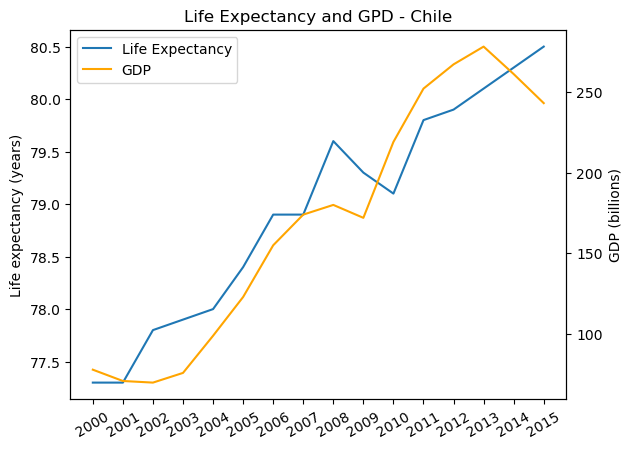

<Figure size 640x480 with 0 Axes>

In [22]:
chile_data = data[data['Country'] == 'Chile']
print(chile_data.gdp_billions.max())
#plt.figure(figsize = (12,8))
fig, ax1 = plt.subplots()
line_1 = ax1.plot(chile_data.Year, chile_data['Life expectancy at birth (years)'], label = 'Life Expectancy')
plt.ylabel('Life expectancy (years)')

ax2 = ax1.twinx()
line_2 = ax2.plot(chile_data.Year, chile_data.gdp_billions, color = 'orange', label = 'GDP')
ax2.set_ylabel('GDP (billions)')
ax2.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: format(int(x), ',')))

lines = line_1 + line_2
labels = [line.get_label() for line in lines]

plt.title('Life Expectancy and GPD - Chile')
ax1.legend(lines, labels ,loc = 'upper left')
ax1.set_xticks(chile_data.Year)
ax1.set_xticklabels(labels = chile_data.Year, rotation = 30)
plt.show()
plt.clf()

     Country  Year  Life expectancy at birth (years)           GDP  \
80  Zimbabwe  2000                              46.0  6.689958e+09   
81  Zimbabwe  2001                              45.3  6.777385e+09   
82  Zimbabwe  2002                              44.8  6.342116e+09   
83  Zimbabwe  2003                              44.5  5.727592e+09   
84  Zimbabwe  2004                              44.3  5.805598e+09   

    gdp_billions  
80             7  
81             7  
82             6  
83             6  
84             6  


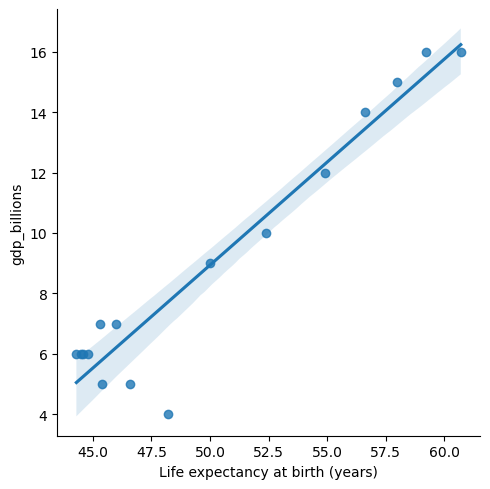

<Figure size 640x480 with 0 Axes>

In [23]:
zimbabwe_data = data[data['Country'] == 'Zimbabwe']
print(zimbabwe_data.head())

sns.lmplot(x = 'Life expectancy at birth (years)', y = 'gdp_billions', data = zimbabwe_data)
plt.show()
plt.clf()

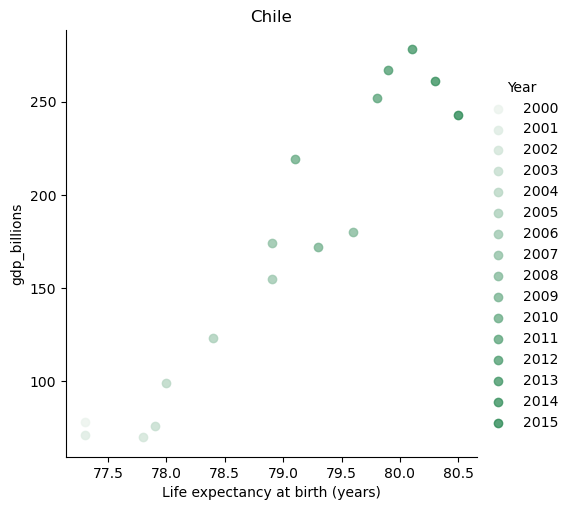

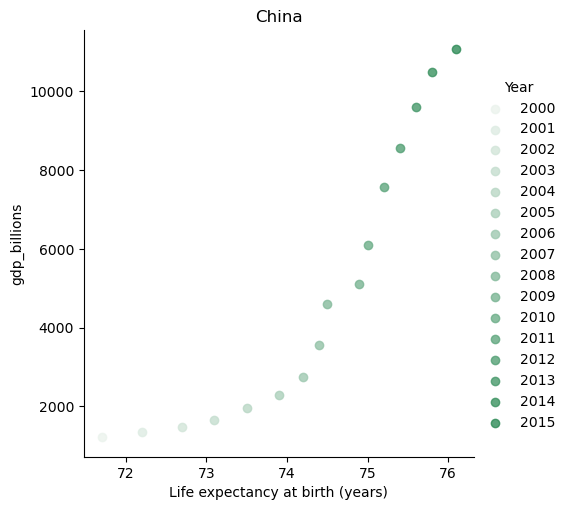

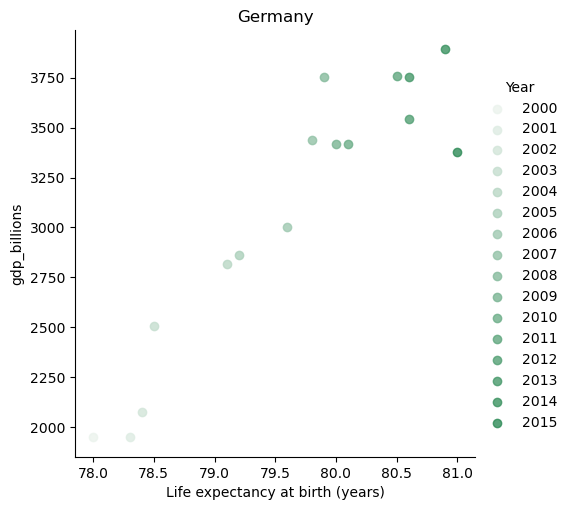

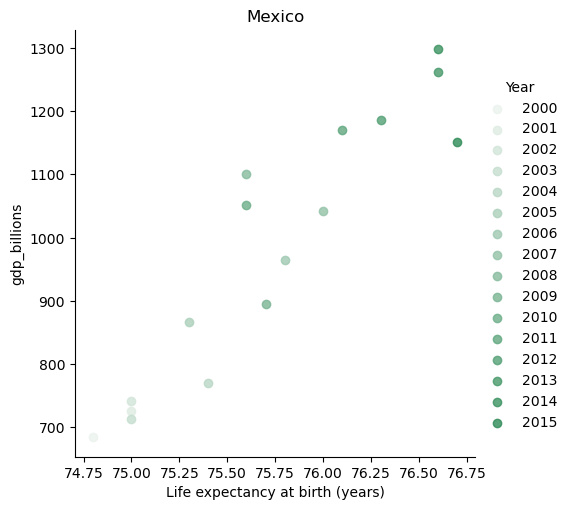

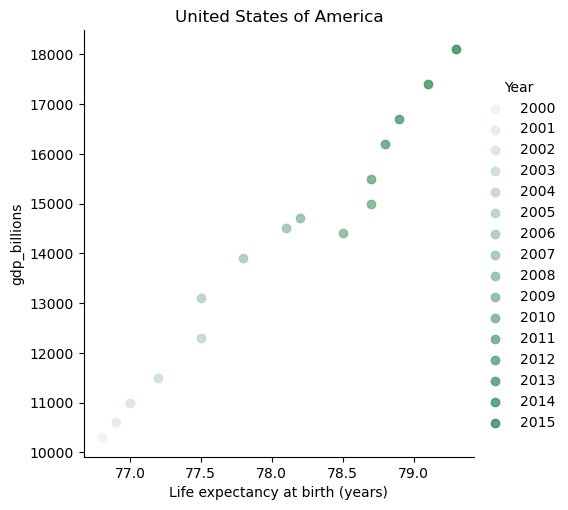

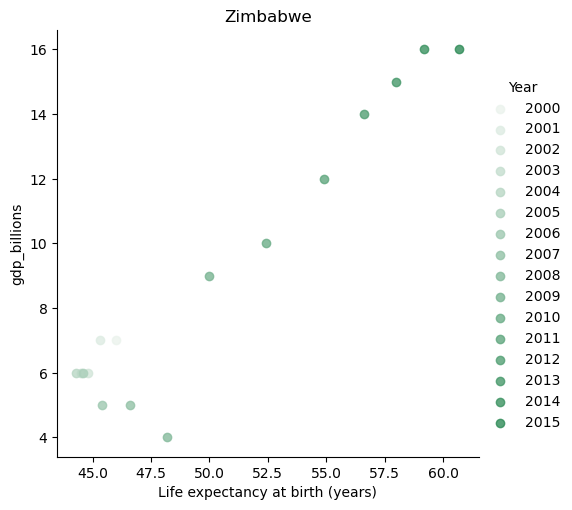

In [24]:
countries = data['Country'].unique()
color_palette = sns.light_palette("seagreen", n_colors = 16)
for country in countries:
    line1 = sns.lmplot(x = 'Life expectancy at birth (years)', y = 'gdp_billions', data = data[data['Country'] == country],
                       hue = 'Year' , palette = color_palette)
    plt.title(country)
    plt.show()

